# 01Desc

## Descriptive Statistics
### Data Sets

- For example, a set of $N$ scalar measurements 

>$ \displaystyle \big\{x_i\big\}_{i=1}^N $

### How to characterize the data?
- Location
- Dispersion
- Shape?

For Lecture 1,

np as np_1
plt as plt_1

In [1]:
# lecture 1 imports
import numpy as np_1
import matplotlib.pyplot as plt_1

In [2]:
%matplotlib inline 

In [3]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'webagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [4]:
N = 1000;
x = np_1.random.randn(N);
print (x[0])

3.5265322942977377


In [5]:
# indexing from 0
print ("%f, %f, ..., %f" % (x[0], x[1], x[N-1]))

# last element
print ("%f = %f" % (x[N-1], x[-1]))

3.526532, 0.417211, ..., 0.275406
0.275406 = 0.275406


In [6]:
[i*i for i in range(5)]

[0, 1, 4, 9, 16]

In [7]:
# index out of bounds
for i in range(N-3,N+1):
    print ("%d : \t %r" % (i, x[i]))

997 : 	 1.4355427051103413
998 : 	 -0.4563246358572952
999 : 	 0.27540589461595893


IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [8]:
# error handling with exceptions
for i in range(N-3,N+5):
    try: 
        print ("%d : \t %r" % (i, x[i]))
    except IndexError as err: 
        print (err)

997 : 	 1.4355427051103413
998 : 	 -0.4563246358572952
999 : 	 0.27540589461595893
index 1000 is out of bounds for axis 0 with size 1000
index 1001 is out of bounds for axis 0 with size 1000
index 1002 is out of bounds for axis 0 with size 1000
index 1003 is out of bounds for axis 0 with size 1000
index 1004 is out of bounds for axis 0 with size 1000


### plots

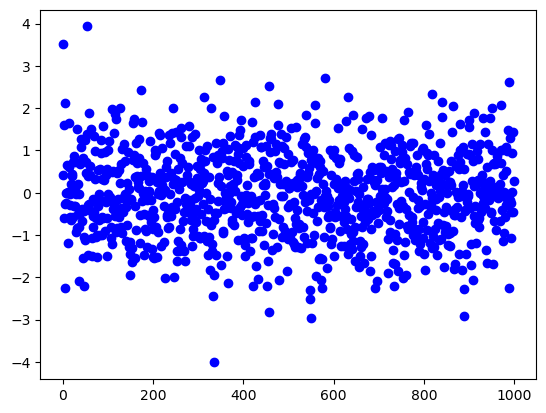

In [9]:
# as a function of the index
plt_1.plot(x,'bo');

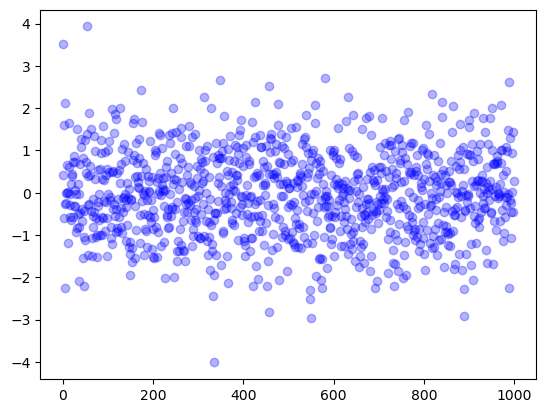

In [10]:
plt_1.plot(x,'bo', alpha=0.3);

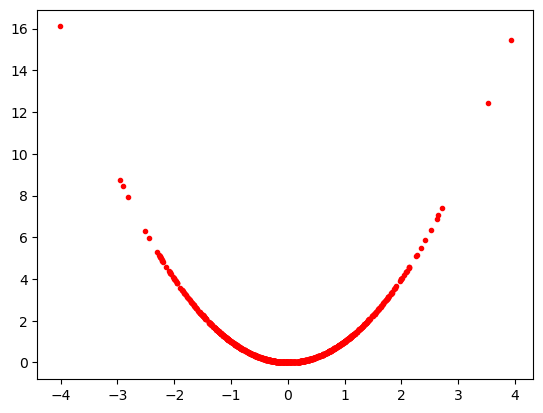

In [11]:
# x vs y=x^2
plt_1.plot(x, x*x, 'r.');

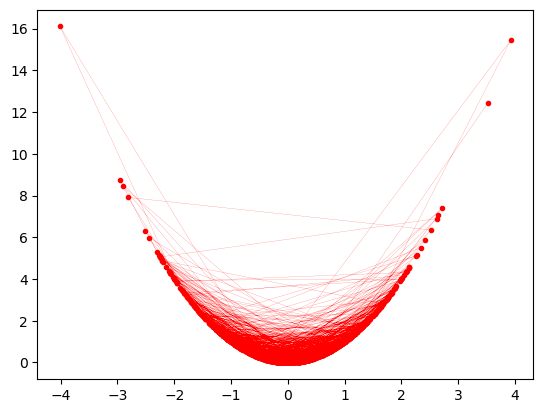

In [12]:
# x vs y=x^2
plt_1.plot(x, x*x, 'r.-', lw=0.1);

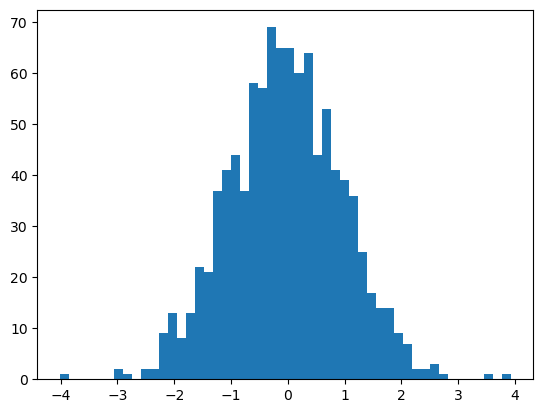

In [13]:
h = plt_1.hist(x, 50)

### Location - Mean, Sum

- Mode 

> where it peaks
<br>
> unimodal vs multimodal

- Sample average

> $\displaystyle \bar{x} = \frac{1}{N} \sum_{i=1}^N x_i$
<br><br>
> but indexing starts with 0 in Python and most computer languages
<br><br>
> $\displaystyle \bar{x} = \frac{1}{N} \sum_{i=0}^{N-1} x_i$

- Median

> The number that separates the higher half of the set from the lower half


In [14]:
avg = np_1.sum(x) / N 
avg, np_1.mean(x)

(-0.03677917567463308, -0.03677917567463308)

In [15]:
x.sum() / x.size

-0.03677917567463308

In [16]:
med = np_1.median(x)
med

-0.05014021221913183

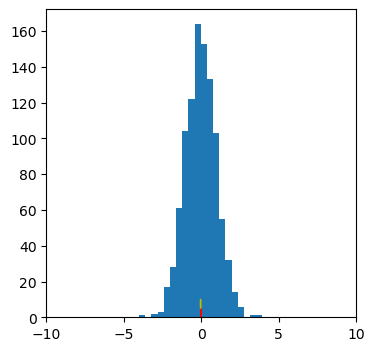

In [17]:
fig = plt_1.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.hist(x,20)
ax.arrow(avg,0,0,5,color='r')
ax.arrow(med,5,0,5,color='y')
ax.set_xlim(-10, 10);

### Dispersion
- Sample variance

> $\displaystyle s^2 = \frac{1}{N\!-\!1} \sum_{i=1}^N \left(x_i - \bar{x}\right)^2$

- Standard deviation

> $\displaystyle s = \sqrt{s^2}$

### Outliers
- What if just one element is too large, e.g., erroneously becomes $+\infty$
- Sample average $\bar{x} \rightarrow +\infty$
- Sample variance explodes, too

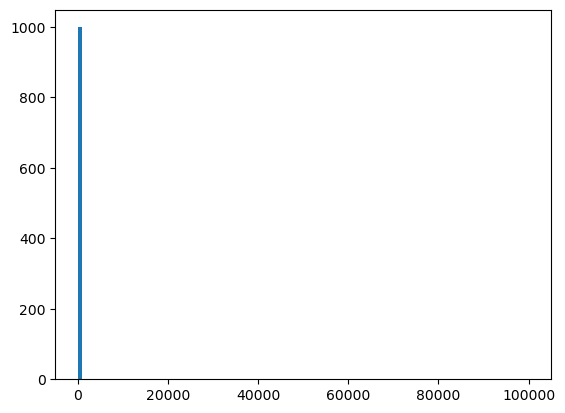

In [18]:
x[0] = 1e5
plt_1.hist(x, 100);

### Robustness
- Robust against outliers? What fraction can we tolerate?
- Median is more robust than the mean
- Median Absolute Deviation (MAD) for dispersion

In [19]:
print ('Average old vs new: %f %f' % (avg, np_1.mean(x)))
print ('Median  old vs new: %f %f' % (med, np_1.median(x)))

Average old vs new: -0.036779 99.959694
Median  old vs new: -0.050140 -0.050140


In [20]:
np_1.std(x), np_1.std(x[1:]) # slicing!

(3160.697554259854, 0.9845457463655612)

End of Lecture 1.

# 02Distributions

### Probability Density Function
- PDF a.k.a. Probability Distribution Density Function
- Probabiliy of $x$ being between $a$ and $b$ for any $(a,b)$ is

> $\displaystyle P_{ab} = \int_a^b p(x)\,dx$

- Always 

> $\displaystyle  \int_{-\infty}^{\infty} p(x)\,dx = 1$


- Example 1: uniform distribution on $(a,b)$

> $\displaystyle  U(x;a,b) = \frac{\pmb{1}_{ab}(x)}{b\!-\!a} $,
> where $\pmb{1}_{ab}(x)$ is 1 between $a$ and $b$, but 0 otherwise

- Example 2: Gaussian or normal distribution

> $\displaystyle  G\left(x;\mu,\sigma^2\right) = \frac{{1}}{\sqrt{2\pi\sigma^2}}\ \exp\left[{-\frac{(x\!-\!\mu)^2}{2 \sigma^2} }\right]$

- Example 3: Log-normal

### Cummulative Distribution Function
- Integral up to a given $x$: prob of being less than $x$

> $\displaystyle \mathrm{CDF}(x) = \int_{-\infty}^{x} p(t)\,dt$

In [21]:
# imports for lecture 2
import numpy as np_2
import matplotlib.pyplot as plt_2
%matplotlib inline

import scipy
import scipy.stats
from scipy.stats import uniform
from scipy.stats import norm as gaussian_2
import math

(-1.0, 1.0)

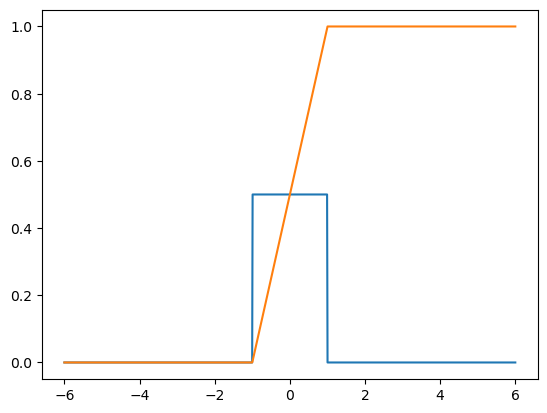

In [22]:
# variable
# a, b, u, x
# labeled as 2 for lecture 2
a_2, b_2 = -1, 1
u_2 = uniform(a_2, b_2-a_2)

x_2 = np_2.linspace(-6, 6, 1000)

plt_2.plot(x_2, u_2.pdf(x_2));
plt_2.plot(x_2, u_2.cdf(x_2));

u_2.support()

(-inf, inf)

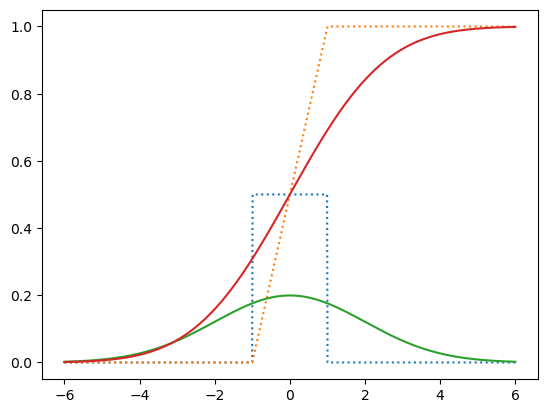

In [23]:
# var: g_2
plt_2.plot(x_2, u_2.pdf(x_2), ':')
plt_2.plot(x_2, u_2.cdf(x_2), ':')

g_2 = gaussian_2(0, 2)

plt_2.plot(x_2, g_2.pdf(x_2));
plt_2.plot(x_2, g_2.cdf(x_2));

g_2.support()

(0.0, inf)

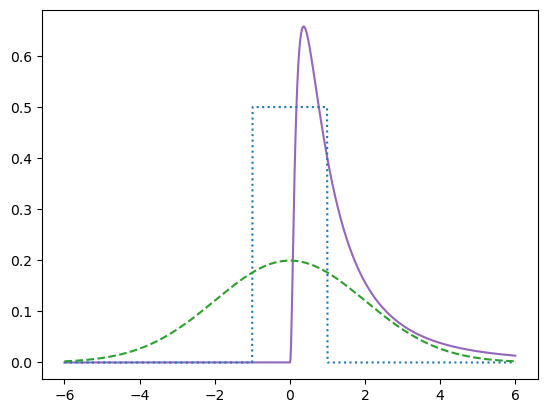

In [24]:
# var: l_2
l_2 = scipy.stats.lognorm(1)

plt_2.plot(x_2, l_2.pdf(x_2), color='C4')

plt_2.plot(x_2, u_2.pdf(x_2), ':', color='C0')
plt_2.plot(x_2, g_2.pdf(x_2), '--', color='C2')

l_2.support()

### Characterization of PDFs

- Expectation value of $X$

> $\displaystyle \mu = \mathbb{E}[X] = \int_{-\infty}^{\infty}\! x\ p(x)\,dx$

- Expectation value of any $f(X)$

> $\displaystyle \mathbb{E}[f(X)] = \int_{-\infty}^{\infty}\! f(x)\,p(x)\,dx$

- Moments 

> $\displaystyle \mathbb{E}[X^k]$
    
- Central moments 

> $\displaystyle \mathbb{E}\big[(X\!-\!\mu)^k\big]$

- Variance

> $\displaystyle \mathbb{Var}[X] = \mathbb{E}\big[(X\!-\!\mu)^2\big]$

- Standard deviation

> $\displaystyle \sigma = \sqrt{\mathbb{Var}[X]}$

- Normalized moments

> $\displaystyle \mathbb{E}\left[\left(\frac{X\!-\!\mu}{\sigma}\right)^k\right]$

- Skewness

> 3rd normalized moment ($k$=3)

- Kurtosis

> 4th normalized moment ($k$=4)
 


In [25]:
# mean, variance, skewness, kurtosis
g_2.stats(moments='mvsk')

(0.0, 4.0, 0.0, 0.0)

In [26]:
u_2.stats(moments='mvsk')

(0.0, 0.3333333333333333, 0.0, -1.2)

In [27]:
l_2.stats(moments='mvsk')

(1.6487212707001282, 4.670774270471604, 6.184877138632554, 110.9363921763115)

In [28]:
# multiple gaussians with the same standard deviation
gaussian_2([0,1,2],3).stats(moments='mv')

(array([0., 1., 2.]), array([9., 9., 9.]))

### Python Examples
- tuple, list, function, class, for, map, lambda, import
- numpy, matplotlib

In [29]:
# tuple
t_2 = (1,'asdf')
t_2 = 100, 0.1
N_2, mu_2 = t_2
print (N_2)

100


In [30]:
# list
l_2 = [1, 2, 3, 4, 5]
print (l_2)

[1, 2, 3, 4, 5]


In [31]:
# numpy array
a_2 = np_2.array([l_2, l_2], dtype=np_2.float64)
a_2

array([[1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.]])

In [32]:
a_2.shape

(2, 5)

In [33]:
np_2.array(l_2).shape

(5,)

In [34]:
# function
def f(x, k=2):
    return x**k

f3_2 = f(3)
print (f3_2)
f(2), f(2,2), f(2,3), f(2,k=4), f3_2

9


(4, 4, 8, 16, 9)

In [35]:
# object-oriented programming
class Robot(object):
    
    def __init__(self, name, x=0, y=0, angle=0):
        self.name, self.x, self.y, self.angle = name, x, y, angle
        self.path = [(x,y)]
    
    def move(self, l=1):
        self.x += l * math.cos(self.angle)
        self.y += l * math.sin(self.angle)
        self.path.append((self.x, self.y))
        
    def left(self, a=math.pi/2):
        self.angle += a
        
    def right(self, a=math.pi/2):
        self.left(-a)

In [36]:
r_2 = Robot('R2D2')
r_2.move()    # by 1 unit
r_2.left()    # 90 degrees
r_2.move(0.2)
r_2.left()
r_2.move(0.4)
r_2.right(np_2.pi/4)
r_2.move()

In [37]:
r_2.path # complete history

[(0, 0),
 (1.0, 0.0),
 (1.0, 0.2),
 (0.6, 0.20000000000000007),
 (-0.10710678118654748, 0.9071067811865476)]

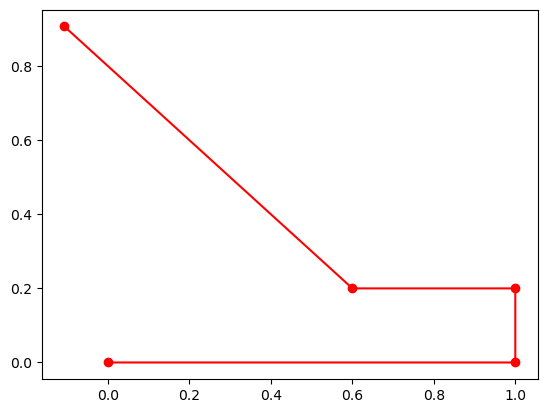

In [38]:
x_2, y_2 = (c for c in zip(*r_2.path)) # unhomework to understand this line
plt_2.plot(x_2, y_2, 'ro-');

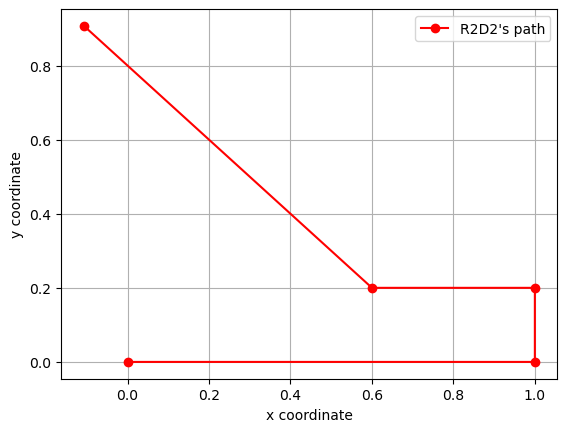

In [39]:
plt_2.plot(x_2, y_2, 'ro-', label=f"{r_2.name}'s path")
plt_2.legend()
plt_2.xlabel('x coordinate')
plt_2.ylabel('y coordinate')
plt_2.grid()
plt_2.savefig('robot.png', dpi=200)
plt_2.savefig('robot.pdf')

In [40]:
# lambda expressions
g_2 = lambda x: x*x
g_2(2)

4

In [41]:
math.pi, math.sin(1.57)

(3.141592653589793, 0.9999996829318346)

In [42]:
# using numpy math
np_2.pi, np_2.sin(1.57)

(3.141592653589793, 0.9999996829318346)

In [43]:
# numpy methods work also on arrays, e.g., elementwise
np_2.sin( [1.57, 3.14, np_2.pi] ) 

array([9.99999683e-01, 1.59265292e-03, 1.22464680e-16])

In [44]:
# arrays: vectors and matrices
l_2 = [1, 2, 3]
a_2 = np_2.array([l_2, l_2], dtype=np_2.int32)

In [45]:
a_2

array([[1, 2, 3],
       [1, 2, 3]], dtype=int32)

In [46]:
print (a_2.shape)
print (a_2.T)

(2, 3)
[[1 1]
 [2 2]
 [3 3]]


In [47]:
[l_2, l_2]

[[1, 2, 3], [1, 2, 3]]

In [48]:
a_2 * a_2 

array([[1, 4, 9],
       [1, 4, 9]], dtype=int32)

In [49]:
a_2.dot(a_2) # why does this fail?

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

In [50]:
b_2 = a_2.T.dot(a_2)
b_2

array([[ 2,  4,  6],
       [ 4,  8, 12],
       [ 6, 12, 18]], dtype=int32)

In [51]:
a_2.T @ a_2

array([[ 2,  4,  6],
       [ 4,  8, 12],
       [ 6, 12, 18]], dtype=int32)

In [52]:
# slicing arrays
#print (b)
b_2[:2,1:-1]

array([[4],
       [8]], dtype=int32)

In [53]:
np_2.logical_or(b_2 < 5, b_2>10)

array([[ True,  True, False],
       [ True, False,  True],
       [False,  True,  True]])

In [54]:
b_2[b_2 < 5]

array([2, 4, 4], dtype=int32)

In [55]:
i_2,j_2 = np_2.where(b_2 < 5)

print (f'i: {i_2}')
print (f'j: {j_2}')
print (f'elements: {b_2[i_2,j_2]}')

i: [0 0 1]
j: [0 1 0]
elements: [2 4 4]


In [56]:
# componentwise operations
print (np_2.sin(l_2))

# slow python loop
for s in map(math.sin, l_2): 
    print (s)

[0.84147098 0.90929743 0.14112001]
0.8414709848078965
0.9092974268256817
0.1411200080598672


In [57]:
[math.sin(x) for x in l_2 if x<2] # little better but not numpy speed

[0.8414709848078965]

End of lecture 2.

# 03-Samples

<h2><font color="darkblue">Sampling and Density Estimation</font></h2>

### Descriptive Statistics
- Characterization of location, dispersion, etc.

| | Sample Estimates <font color="white">(notations)</font> | Probabilisty Density Functions   |
|--|--------------|-------------|
| **Average** | $\displaystyle\ \bar{x}=\frac{1}{N}\sum_{i=1}^N x_i = \big\langle x_i \big\rangle_{i=1}^N$ | $\displaystyle\ \mu = \mathbb{E}[X] =\!\int\!x\,p(x)\,dx$| 
| **Variance** | $\displaystyle\ s^2=\frac{1}{N\!-\!1}\sum_{i=1}^N \big(x_i\!-\!\bar{x}\big)^2 $|  $\displaystyle\ \mathbb{Var}[X] =\!\int\!(x\!-\!\mu)^2 p(x)\,dx$| 

- Useful connection to sampling

### Sampling from distributions

- Uniform between $a$ and $b$: scale and shift

>$\displaystyle U_{ab} = a + (b\!-\!a)\,U_{01} $

- Inverse transform sampling in $\mathbb{R}$

>$\displaystyle X = \mathrm{CDF}^{-1}(U_{01}) $


### Numerical Methods
If the $\left\{x_i\right\}$ set is sampled from the probability density function $p(\cdot)$,
the following will be true:
- Average

>$\displaystyle\mathbb{E}[X] =\!\int x\ p(x)\,dx  \ \approx\ \frac{1}{N}\sum_i x_i $

> Or a function of $x$
>
>$\displaystyle\mathbb{E}[f(X)] =\!\int f(x)\ p(x)\,dx  \ \approx\ \frac{1}{N}\sum_i f(x_i) $

- Variance

>$\displaystyle\mathbb{E}[(X\!-\!\mu)^2]=\int (x\!-\!\mu)^2\ p(x)\,dx \approx \frac{1}{N}\sum_i (x_i\!-\!\mu)^2$
><br/><br/>
> compare to
><br/><br/>
>$\displaystyle\ s^2=\frac{1}{N\!-\!1}\sum_{i=1}^N \big(x_i\!-\!\bar{x}\big)^2 $
><br/><br/>
> Bessel correction: $N\!-\!1$ independent $(x_i\!-\!\bar{x})$ differences
<br/><br/>
>$\displaystyle \sum_{i=1}^N (x_i\!-\!\bar{x}) =\ ???$ <font color="white">.... 0 ...</font>


In [58]:
# imports for lecture 3
import numpy as np_3
import matplotlib.pyplot as plt_3
%matplotlib inline
from scipy.stats import norm

In [59]:
# from scipy.stats import norm as gaussian
# generate N samples
mu, sigma, N = 0, 1, 5

# pick a distribution
gauss = norm(mu, sigma)

# get random variates
x = gauss.rvs(N)

avg = x.mean()
print (f'avg: {avg}')

# variance estimates
s2   = np_3.sum( (x-avg)**2 ) /(N-1)  # corrected
s2n  = np_3.sum( (x-avg)**2 ) / N     # biased 
s2k  = np_3.sum( (x- mu)**2 ) / N     # known mean

print (f'''var: 
    {s2:.4f} corrected 
    {s2n:.4f} biased 
    {s2k:.4f} known mean
    ''') 

avg: 0.4113868909136288
var: 
    3.1056 corrected 
    2.4845 biased 
    2.6538 known mean
    


(5, 100000) (100000,)
(100000,)
0.9993972653340862 0.7995178122672687 1.0005567615999114


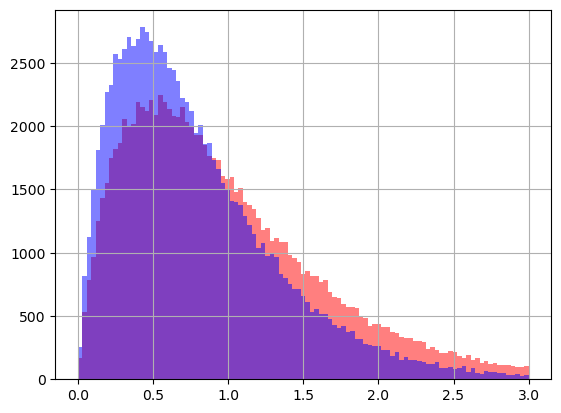

In [60]:
# generate M runs with N samples each
N, M = 5, 100000
X = gauss.rvs((N,M))
avg = X.mean(axis=0)
print (X.shape, avg.shape)

# variance estimates - check out broadcasting in X-avg
s2   = np_3.sum( (X-avg)**2, axis=0) /(N-1) # correct
s2n  = np_3.sum( (X-avg)**2, axis=0) / N    # biased
s2k  = np_3.sum( (X- mu)**2, axis=0) / N    # known mean

print (s2.shape)

# averages
print (s2.mean(), s2n.mean(), s2k.mean())

plt_3.hist(s2 , 101, range=[0,3], color='r', alpha=0.5);
plt_3.hist(s2n, 101, range=[0,3], color='b', alpha=0.5);
plt_3.grid()

### Density Estimation
- Histograms
    - Width of bins, $h$
    - Start of bin boundary, $x_0$

 >$\displaystyle \mathrm{Hist}(x) = \frac{1}{N}\sum_i \pmb{1}_{\mathrm{bin}(x_i;x_0,h)}(x)$
        
- Kernel Density Estimation (KDE)
    - Bandwidth $h$
   
 >$\displaystyle \mathrm{KDE}(x) = \frac{1}{N}\sum_i K_h(x\!-\!x_i) = \frac{1}{Nh}\sum_i K\left(\frac{x\!-\!x_i}{h}\right)$
   
  - Can use different $K(\cdot)$ kernel functions
    - E.g., Uniform, Triangular, Gauss, Epanechnikov

See animations at
http://www.mglerner.com/blog/?p=28

### Kernel Function
- Finite vs Infinite support
- Numerical evaluations
- Frequently used kernels





### Detour: Dirac delta

- In the limit of $h\rightarrow{}0$, the kernel will become strange:

> **Dirac's $\delta$** "function" is 0 everywhere except at 0 such that
<br/>
> $\displaystyle \int \delta(x)\,dx = 1$

- Interesting properties, e.g., 

> $\displaystyle \int f(x)\,\delta(x\!-\!a)\,dx = f(a)$

-  See **distribution theory** and **functionals** for more background

### An interesting result 

- Bad density estimation but if...

> $\displaystyle p(x) = \frac{1}{N} \sum_{i=1}^N \delta(x\!-\!x_i)$

- The expectation value

> $\displaystyle \mathbb{E}[X] =  \int x\, \frac{1}{N} \sum_{i=1}^N  \delta(x\!-\!x_i) \,dx$
> <br/><br/>
> $\displaystyle \mathbb{E}[X] = \frac{1}{N} \sum_{i=1}^N \int x\, \delta(x\!-\!x_i) \,dx$
><br/><br/>
> $\displaystyle \mathbb{E}[X] = \frac{1}{N} \sum_{i=1}^N x_i$


End of lecture 3.

# 05-Least Squares

## Bivariate and Multivariate

### Dependence
- Consider random variables $X$, $Y\in\mathbb{R}$

> We can look at them separately but ...
>
> Are they "related" at all?

- Dependent variables

>$\displaystyle P(X, Y) \neq P(X)\,P(Y)$ 
> 
>More on this later...

### Covariance

- Definition 

>$\displaystyle \textrm{cov}(X,Y)=\mathbb{E}\Big[\big(X-\mathbb{E}[X]\big)\big(Y-\mathbb{E}[Y]\big)\Big]$  
>
> Other notations: $\mathrm{C}_{X,Y}$, $\sigma(X,Y)$, ...

- Sample covariance

>$\displaystyle C = \frac{1}{N\!-\!1}\sum_{i=1}^N (x_i-\bar{x})(y_i-\bar{y})$

### Answers

1) If $X$ and $Y$ are independent, are they also uncorrelated?

        [x] Yes      [ ] No

> Independence yields $ \mathbb{E}[XY]=\mathbb{E}[X]\ \mathbb{E}[Y]$, hence the covariance
>$ \mathbb{E}[ (X\!-\!\mu_X)(Y\!-\!\mu_Y) ] = \mathbb{E}[ XY - X \mu_y - \mu_X Y  + \mu_X\mu_Y] = 0$

2) If $X$ and $Y$ are uncorrelated, are they also independent?

        [ ] Yes      [x] No


> For example, let random variable $X$ have a normal distribution, $X\sim{}{\cal{}N}(0,1)$, and let $Y=X^2$.
> They are clearly dependent but are they correlated?
>
>$\mathbb{E}[ (X\!-\!0)(X^2\!-\!\mu_{X^2}) ] = \mathbb{E}[X^3-X\,\mu_{X^2}] $ $= \mathbb{E}[X^3] - \mathbb{E}[X]\,\mu_{X^2} = 0 - 0$ 

### Correlation

>$\displaystyle \textrm{corr}(X,Y)=\frac{\textrm{cov}(X,Y)}{\sigma_X\,\sigma_Y}$  

### Vector Notation

- Let $\boldsymbol{V}$ represent the 2-vector of random scalar variables $X$ and $Y$

>$\boldsymbol{V} = \begin{pmatrix}X\\Y\end{pmatrix}$

- Mean

>$\displaystyle \mathbb{E}[\boldsymbol{V}] = \begin{pmatrix}\mathbb{E}[X]\\\mathbb{E}[Y]\end{pmatrix} = \begin{pmatrix}\mu_X\\\mu_Y\end{pmatrix}$

- Covariance matrix

>$\displaystyle \Sigma_{\boldsymbol{V}} = \mathbb{E}\Big[\big(\boldsymbol{V}\!-\!\mathbb{E}[\boldsymbol{V}]\big)\big(\boldsymbol{V}\!-\!\mathbb{E}[\boldsymbol{V}]\big)^T\Big]$ $ = \left( \begin{array}{ccc}
\sigma_X^2 & \mathrm{C}_{X,Y}  \\
\mathrm{C}_{Y,X} & \sigma_Y^2  \end{array} \right)$
>
> Same generalization of variance works in any dimensions

### Bivariate Normal Distribution
- Independent and uncorrelated

>$ \displaystyle {\cal N}(x,y;\mu_x,\mu_y,\sigma_x,\sigma_y) = \frac{1}{2 \pi \sigma_x \sigma_y}\ \exp\left[-\frac{(x\!-\!\mu_x)^2}{2\sigma_x^2} -\frac{(y\!-\!\mu_y)^2}{2\sigma_y^2} \right] $

- In general, for 2-vector $\boldsymbol{x}$

>$ \displaystyle{\cal N}(\boldsymbol{x};\boldsymbol{\mu},\Sigma) = \frac{1}{2\pi \lvert \Sigma \rvert^{\frac{1}{2}} }\ \exp\left[-\frac{1}{2} (\boldsymbol{x}\!-\!\boldsymbol{\mu})^T \Sigma^{-1} (\boldsymbol{x}\!-\!\boldsymbol{\mu})\right]$
>
> where $\lvert \Sigma \rvert$ is the determinant - other notation $\det\Sigma$ or $\det\!\left(\Sigma\right)$

- Uncorrelated if

>$ \displaystyle \Sigma = \left( \begin{array}{ccc}
\sigma_X^2 & 0  \\
0 & \sigma_Y^2  \end{array} \right)$

### Multivariate Normal Distribution

- In $k$ dimensions - not bold but $k$-vectors


>$ \displaystyle{\cal N}(x;\mu,\Sigma) = \frac{1}{\sqrt{(2\pi)^{k} \lvert \Sigma \rvert} }\ \exp\left[-\frac{1}{2} (x\!-\!\mu)^T \Sigma^{-1} (x\!-\!\mu)\right]$


- Or even simpler


>$ \displaystyle{\cal N}(x;\mu,\Sigma) = \frac{1}{\sqrt{\lvert 2\pi \Sigma \rvert} }\ \exp\left[-\frac{1}{2} (x\!-\!\mu)^T \Sigma^{-1} (x\!-\!\mu)\right]$

### Detour: Another way to Sample from Gaussians
- Uncorrelated ${\cal N}(0,I)$: Box-Muller transform 

> Using 2 uniform randoms between 0 and 1
>
>$ Z_1 = \sqrt{-2\ln U_1}\,\cos\big(2\pi U_2\big)$ 
>
>$ Z_2 = \sqrt{-2\ln U_1}\,\sin\big(2\pi U_2\big)$ 

- Tranform: scale, rotate, shift

In [62]:
# lecture 5 imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

(2,)


array([2.13447792, 5.10536785])

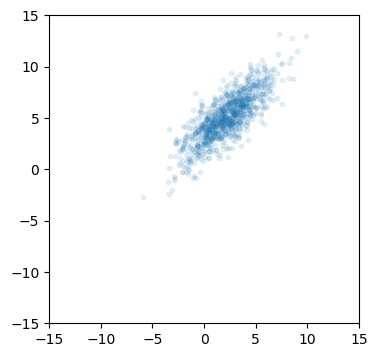

In [63]:
# generate many 2D (column) vectors
X = scipy.stats.norm.rvs(0,1,(2,1000))
X[0,:] *= 3  # scale axis 0
f = np.pi/4  # rotate by f
R = np.array([[np.cos(f),-np.sin(f)],
              [np.sin(f), np.cos(f)]]) 
V = R @ X
V += np.array([[2],
               [5]]) # shift with a vector
# plot on square figure
plt.figure(figsize=(4,4)); a=15; plt.xlim(-a,a); plt.ylim(-a,a)
plt.plot(V[0,:],V[1,:], '.', alpha=0.1)

# sample average
averages = V.mean(axis=1)
print (averages.shape)
averages

In [64]:
#avg = averages.reshape(averages.size,1)
avg = averages[:,np.newaxis] 
print ("Average: ")
print (avg)

# sample covariance matrix
C = (V-avg) @ (V-avg).T / (V.shape[1]-1) 
print ("Cov:")
print (C) 

Average: 
[[2.13447792]
 [5.10536785]]
Cov:
[[4.9619545  3.96533742]
 [3.96533742 4.98146613]]


## Method of Least Squares

### The Idea

- Fit a model to training set $\big\{ (x_i, y_i) \big\}$

> Parameterized function $f(x;\theta)$, where $\theta$ can represent multiple parameters

- Minimize the mean or sum of square errors or residuals (SSE, SSR, MSE, MSR?)

> Residual   
>$r_i(\theta) = y_i - f(x_i;\theta)$
>
> Estimation  
>$\displaystyle \hat{\theta} = \arg\min_{\theta} \sum_i \big[y_i-f(x_i;\theta)\big]^2$
 
- Optimization is simple for certain models

### The Simplest Case
- Fitting a constant? Model with $f(x;\mu)=\mu$

>$\displaystyle C(\mu) = \sum_{i=1}^N \big(y_i\!-\!\mu\big)^2$

- Derivative $C'= dC \big/ d\mu$ vanishes at solution $\hat{\mu}$

>$\displaystyle C'(\hat{\mu}) = 0$
>
>$\displaystyle 2\sum_{i=1}^N \big(y_i\!-\!\hat{\mu}\big)(-1)=0$
>
>$\displaystyle \sum_{i=1}^N y_i - N \hat{\mu} = 0 $
>
>$\displaystyle \hat{\mu} = \frac{1}{N}\sum_{i=1}^N y_i \ \ \ \ \ $  -  average

### Heteroscedasticity
- Same model with $f(x;\mu)=\mu$

>$\displaystyle C(\mu) = \sum_{i=1}^N \frac{\big(y_i\!-\!\mu\big)^2}{\sigma_i^2} $
>
> with  $\ w_i=1 \big/ \sigma_i^2$
>
>$\displaystyle  C(\mu) = \sum_{i=1}^N w_i\big(y_i\!-\!\mu\big)^2 $

- Derivative $C'= dC \big/ d\mu$ vanishes at $\hat{\mu}$

>$\displaystyle C'(\hat{\mu}) = 0$
>
>$\displaystyle 2\sum_{i} w_i \big(y_i\!-\!\hat{\mu}\big)(-1)=0$
>
>$\displaystyle \sum_{i} w_i y_i - \hat{\mu}\sum_{i} w_i  = 0 $
>
>$\displaystyle \hat{\mu} = \frac{\sum w_i y_i}{\sum w_i} \ \ \ \ \ \ $ - weighted average

### Simple Fitting
- A linear model with $\boldsymbol{\theta}=(a,b)^T$ parametrization $f(x;\boldsymbol{\theta}) = a + b\,x$
  
>$\displaystyle \hat{\boldsymbol\theta} = \arg\min \sum_i \big[y_i-(a + b\,x_i)\big]^2$

- Derivatives w.r.t. $a$ and $b$ should vanish

> We have 2 variables and 2 equations
> <br/><br/>
> Quadratic becomes linear $\rightarrow$ analytic solution!

### Linear Regression
- A linear combination of known $\phi_k(\cdot)$ functions (basis functions)

>$\displaystyle f(x;\boldsymbol{\beta}) = \sum_{k=1}^K \beta_k\, \phi_k(x) $
> <br/><br/>
> It's a dot product
> <br/><br/>
>$\displaystyle f(x;\boldsymbol{\beta}) = \boldsymbol\beta^T \boldsymbol\phi(x)$ 
> <br/><br/>
>with $\boldsymbol{\beta}=(\beta_1,\dots,\beta_K)^T$


- Linear in $\boldsymbol{\beta}$, cost function is quadratic

>$\displaystyle C = \sum_{i=1}^N \left\{ y_i - \sum_{k=1}^K \beta_k\, \phi_k(x_i) \right\}^2$


- Introducing the design matrix $X$ with components

>$\displaystyle X_{ik} = \phi_k(x_i) $

- Linear in $\boldsymbol{\beta}$, cost function is quadratic

>$\displaystyle C = \sum_{i=1}^N \left\{ y_i - \sum_{k=1}^K X_{ik}\beta_k\right\}^2$

### Minimization

- Partial derivatives
  

>$\displaystyle \frac{\partial{}C}{\partial{}\beta_l} = 2\sum_i \left\{ y_i - \sum_{k=1}^K X_{ik}\beta_k \right\} 
\left[ -\frac{\partial f(x_i;\boldsymbol{\beta})}{\partial \beta_l} \right]$
> <br/><br/>
> and
> <br/><br/>
>$\displaystyle \frac{\partial f(x_i;\boldsymbol{\beta})}{\partial \beta_l} =\sum_k \frac{\partial{}\beta_k}{\partial{}\beta_l}\,\phi_k(x_i) = \phi_l(x_i) = X_{il}$
> <br/><br/>
> **Note:** $\partial{}\beta_k \big/ \partial{}\beta_l=\delta_{kl}$ Kronecker delta

### Detour: The Kronecker Delta

- Definition

>$ \delta_{kl} = \left\{ \begin{array}{ll}
         1 & \mbox{if $k=l$}\\
         0 & \mbox{if $k\neq{}l$}\end{array} \right.  $
         
- Useful to remember

>$ \displaystyle \sum_l \delta_{kl}\,a_l = a_k$
> <br/><br/>
> Cf. identity matrix:
>$ I\, \boldsymbol{a} = \boldsymbol{a}$

### Result

- At the optimum we have


>$\displaystyle \sum_i \left\{ y_i - \sum_{k} \hat\beta_k\, \phi_k(x_i) \right\}\, \phi_l(x_i)  = 0$
> <br/><br/>
>$\displaystyle \sum_i \left\{ y_i - \sum_{k} X_{ik}\hat\beta_k\ \right\}\, X_{il}  = 0$
> <br/><br/>
>$\displaystyle \sum_i X_{il} y_i  - \sum_i \sum_k  X_{il} X_{ik} \hat{\beta}_k = 0$
> <br/><br/>
>$\displaystyle \sum_i  X_{il} y_i = \sum_k \left(\sum_i X_{il} X_{ik}\right) \hat{\beta}_k$

- I.e.,

>$\displaystyle X^T y = X^T X \hat{\beta} $
> <br/><br/>
>$\displaystyle \hat\beta = (X^T X)^{-1} X^T y = X^+ y$

- See **Moore-Penrose pseudoinverse**, **generalized inverse**

- See also **Singular Value Decomposition**

### Hat matrix

- Looking at the definition of $X$ we see that the model at $\hat{\beta}$ predicts $\hat{y}_i$ values

>$\displaystyle \hat{y} = X\,\hat\beta = X\,(X^T X)^{-1} X^T y $
> <br/><br/>
> which is
> <br/><br/>
>$\displaystyle \hat{y}  = H\,y\ \ \ $
> with 
>$\ \ \displaystyle {H} = X\,(X^T X)^{-1} X^T$

(50,)

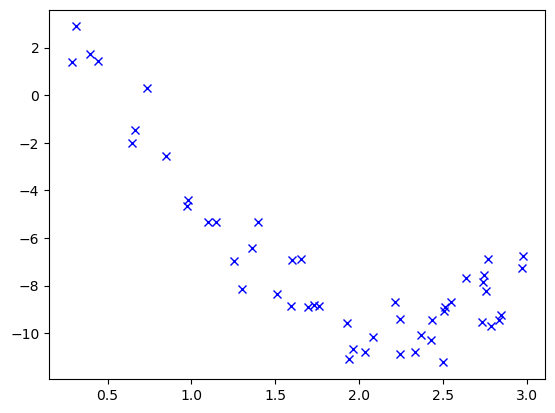

In [65]:
# generate sample with error
x = 3 * np.random.rand(50) # between 0 and 3
e = 1 * np.random.randn(x.size) # noise
#y = (0.1*x**3 + 0.5*x**2 + 2*x + 1) + e;  plot(x,y,'bo');
y = 10*np.cos(x+1) + e;  plt.plot(x,y,'bx');x.shape

array([-0.32679833, -3.63518224])

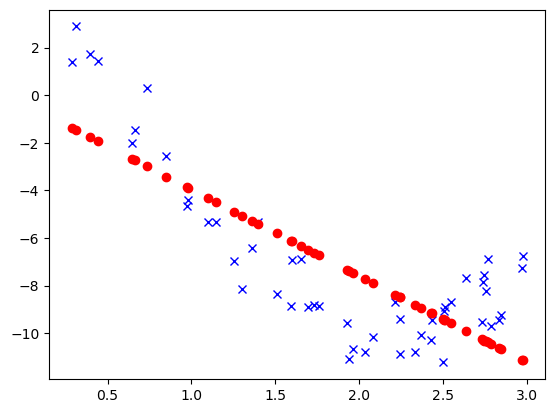

In [67]:
# linear model f(x) = b0 + b1 x
# Augment the data with an additional column of ones 
# because we have a columne with X's as 1's(for b)
X = np.ones((x.size,2));
X[:,1] = x

Xpinv = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)
bHat = np.dot(Xpinv,y)
yHat = np.dot(X,bHat)

plt.plot(x,y,'bx'); plt.plot(x,yHat,'ro'); bHat

array([-0.32679833, -3.63518224])

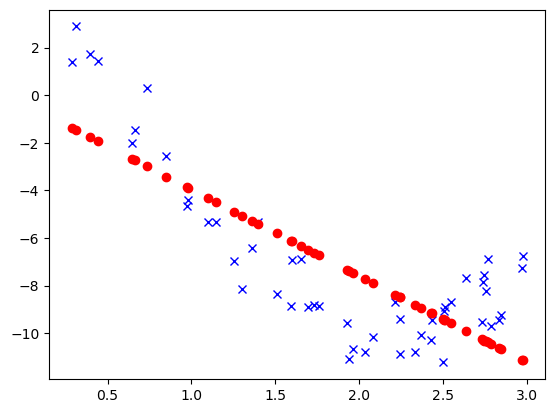

In [68]:
# same using @ operator
Xpinv = np.linalg.inv(X.T @ X) @ X.T
bHat = Xpinv @ y
yHat = X @ bHat

plt.plot(x,y,'bx'); plt.plot(x,yHat,'ro'); bHat

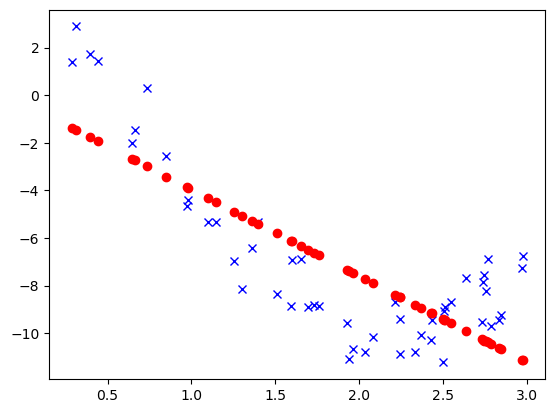

In [69]:
# same again with pinv() and the Hat matrix
H = X @ np.linalg.pinv(X)
yHat = H @ y

plt.plot(x,y,'bx'); plt.plot(x,yHat,'ro');

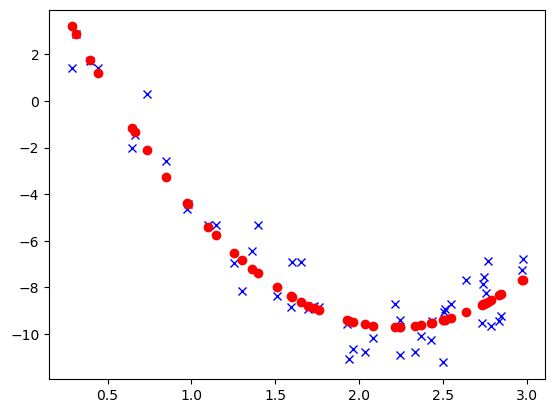

In [70]:
# linear model f(x) = b0 + b1 x + b2 * x^2
X = np.ones((x.size,3));
X[:,1] = x    # partials wrt. b1
X[:,2] = x*x  # wrt. b2

# the rest is the same as before
bHatQ = np.linalg.pinv(X) @ y
yHatQ = X @ bHatQ

plt.plot(x,y,'bx'); plt.plot(x,yHatQ,'ro');

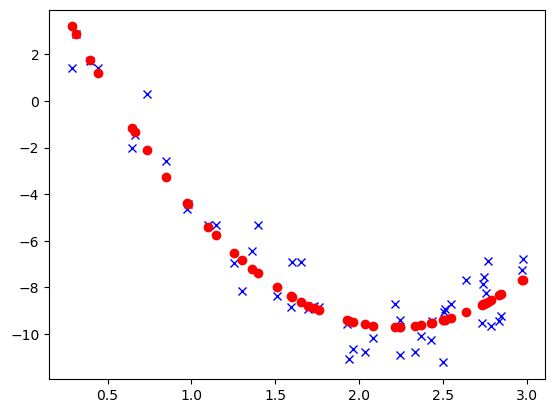

In [71]:
# or like this
yHatQ = X @ np.linalg.pinv(X) @ y

plt.plot(x,y,'bx'); plt.plot(x,yHatQ,'ro');


### Heteroscedastic error

- Simple modification

>$\displaystyle C = \sum_{i=1}^N w_i \left\{ y_i - \sum_{k=1}^K X_{ik}\beta_k\right\}^2$
> <br/><br/>
> yields
> <br/><br/>
>$\displaystyle \sum_i w_i \left\{ y_i - \sum_{k} X_{ik} \hat\beta_k\ \right\}\, X_{il}  = 0$
> <br/><br/>
>$\displaystyle \sum_i  X_{il} w_i y_i = \sum_k \left(\sum_i X_{il} w_i X_{ik}\right) \hat{\beta}_k$


- Diagonal weight matrix $W$

>$\displaystyle X^T W y = X^T W X \hat{\beta} $
> <br/><br/>
>$\displaystyle \hat\beta = (X^T W X)^{-1} X^T W y $
> <br/><br/>
> If not diagonal, correlated errors!



End of lecture 5.